<a href="https://colab.research.google.com/github/jgh0707/NLP_2023/blob/main/%EB%94%94%EC%A7%80%ED%84%B8%EC%9D%B8%EB%AC%B8%ED%95%99%20%EC%8B%A4%EC%8A%B581.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#디지털인문학 실습 과제81
##23.12.13
##복습

In [4]:
import os

In [5]:
os.mkdir("txtdata")

In [6]:
!pip install corpus-toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:00


In [7]:
from urllib.request import urlopen
url="https://raw.githubusercontent.com/ms624atyale/Temp_Data/main/PG_Aesop_NoQuotesAllText.txt"

os.system("curl " + url + " > txtdata.txt")

file = open("txtdata.txt")
text = file.read().replace("\n", " ")
file.close()

In [10]:
from corpus_toolkit import corpus_tools as ct
mydata = ct.ldcorpus("txtdata")
tok_corp = ct.tokenize(mydata)
for token in tok_corp:
  print(token)

count = len(token)
print(count)

Processing txtdata.txt (1 of 1 files)
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make', 'he', 'think', 'he', 'be', 'a', 'grown-up', 'billy', 'goat', 'and', 'able', 'to', 'take', 'care', 'of', 'himself', 'so', 'one', 'even', 'when', 'the', 'flock', 'start', 'home', 'from', 'the', 'pasture', 'and', 'he', 'mother', 'call', 'the', 'kid', 'pay', 'no', 'heed', 'and', 'keep', 'right', 'on', 'nibble', 'the', 'tender', 'grass', 'a', 'little', 'late', 'when', 'he', 'lift', 'he', 'head', 'the', 'flock', 'be', 'go', 'he', 'be', 'all', 'alone', 'the', 'sun', 'be', 'sink', 'long', 'shadow', 'come', 'creep', 'over', 'the', 'ground', 'a', 'chilly', 'little', 'wind', 'come', 'creep', 'with', 'they', 'make', 'scary', 'noise', 'in', 'the', 'grass', 'the', 'kid', 'shiver', 'a', 'he', 'think', 'of', 'the', 'terrible', 'wolf', 'then', 'he', 'start', 'wildly', 'over', 'the', 'field', 'bleat', 'for', 'he', 'mother', 'but', 'not', 'half-way', 'near', 'a', 'clump', 'of', 'tree', 'th

In [9]:
mydata = ct.frequency(mydata)

In [11]:
ct.write_corpus("tagged_txt",ct.tag(ct.ldcorpus("txtdata")))

Processing txtdata.txt (1 of 1 files)


In [12]:
tagged_freq = ct.frequency(ct.reload("tagged_txt"))
ct.head(tagged_freq, hits = 10)

Processing 1.txt (1 of 1 files)
the_DET	1911
a_DET	832
be_AUX	831
and_CCONJ	775
he_PRON	761
to_PART	566
of_ADP	504
his_PRON	360
in_ADP	353
you_PRON	313


In [13]:
type(tagged_freq)

dict

In [14]:
import pandas as pd

In [15]:
data_dict = tagged_freq
data_items = data_dict.items()
data_list = list(data_items)
print(data_list)

df = pd.DataFrame(data_list)
df.columns = ["Tagged","Freq"]
print(df)

[('there_PRON', 39), ('be_VERB', 32), ('once_ADV', 34), ('a_DET', 832), ('little_ADJ', 42), ('kid_NOUN', 4), ('whose_DET', 8), ('grow_VERB', 14), ('horn_NOUN', 20), ('make_VERB', 97), ('he_PRON', 761), ('think_VERB', 50), ('be_AUX', 831), ('grown_NOUN', 1), ('up_ADP', 102), ('Billy_PROPN', 1), ('Goat_PROPN', 19), ('and_CCONJ', 775), ('able_ADJ', 9), ('to_PART', 566), ('take_VERB', 58), ('care_NOUN', 12), ('of_ADP', 504), ('himself_PRON', 48), ('so_ADV', 141), ('one_NUM', 128), ('evening_NOUN', 14), ('when_SCONJ', 123), ('the_DET', 1911), ('flock_NOUN', 14), ('start_VERB', 9), ('home_ADV', 8), ('from_ADP', 83), ('pasture_NOUN', 11), ('his_PRON', 360), ('mother_NOUN', 11), ('call_VERB', 27), ('Kid_PROPN', 10), ('pay_VERB', 8), ('no_DET', 39), ('heed_NOUN', 1), ('keep_VERB', 33), ('right_ADV', 7), ('on_ADP', 133), ('nibble_VERB', 4), ('tender_ADJ', 5), ('grass_NOUN', 7), ('later_ADV', 9), ('lift_VERB', 3), ('head_NOUN', 42), ('go_VERB', 72), ('all_ADV', 19), ('alone_ADJ', 2), ('sun_NOUN',

In [16]:
tagged = df["Tagged"]
pos = []
word = []

for i in range(0, len(tagged)):
  w = tagged[i]
  ws = w.split("_")
  word.append(ws[0])
  pos.append(ws[1])

print(len(tagged))
print(word[:10])
print(pos[:10])

3000
['there', 'be', 'once', 'a', 'little', 'kid', 'whose', 'grow', 'horn', 'make']
['PRON', 'VERB', 'ADV', 'DET', 'ADJ', 'NOUN', 'DET', 'VERB', 'NOUN', 'VERB']


In [17]:
df["POS"] = pos
df["Word"] = word

cols = ["POS","Word","Freq"]
df = df[cols]

df = df.sort_values(by=['POS', 'Freq'], ascending = False)
print("Total rows: ", len(df))
df.head()

Total rows:  3000


,POS,Word,Freq
1615,X,nearer,1
2400,X,ass,1
88,VERB,say,158
402,VERB,have,122
184,VERB,see,112


In [18]:
df1 = df[df["POS"] == "VERB"]
print(len(df1))


freq1 = list(df1["Freq"]); print(len(freq1))
txt1 = list(df1["Word"]); print(len(txt1))

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y); print(len(txt2))
print(txt2)

690
690
690
20695
say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say say have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have have 

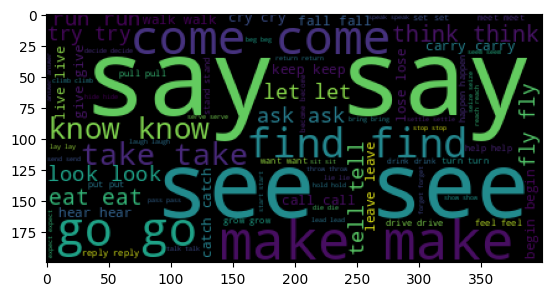

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(str(txt2))
plt.imshow(wc)

690
       POS      Word  Freq
88    VERB       say   158
402   VERB      have   122
184   VERB       see   112
9     VERB      make    97
465   VERB       get    84
...    ...       ...   ...
2985  VERB      yard     1
2987  VERB   express     1
2989  VERB  approach     1
2990  VERB      shut     1
2995  VERB    circle     1

[690 rows x 3 columns]


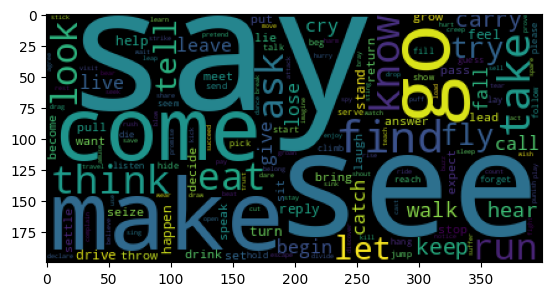

In [20]:
pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

1169
       POS         Word  Freq
211   NOUN          day    74
451   NOUN         time    63
49    NOUN         head    42
80    NOUN          way    33
311   NOUN        water    32
...    ...          ...   ...
2986  NOUN      thicket     1
2992  NOUN         gain     1
2996  NOUN     boasting     1
2997  NOUN  chanticleer     1
2998  NOUN        rival     1

[1169 rows x 3 columns]


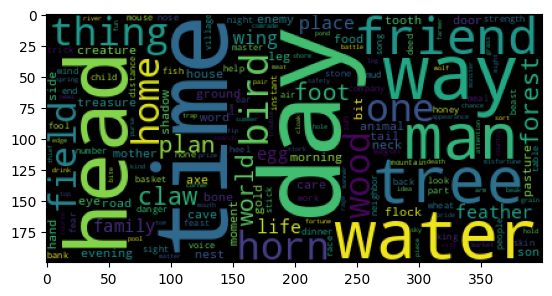

In [21]:
pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

447
      POS        Word  Freq
299   ADJ        good    57
325   ADJ       great    53
4     ADJ      little    42
290   ADJ         old    36
191   ADJ       other    35
...   ...         ...   ...
2966  ADJ      brazen     1
2972  ADJ    restless     1
2977  ADJ  respectful     1
2980  ADJ    grandest     1
2988  ADJ       harsh     1

[447 rows x 3 columns]


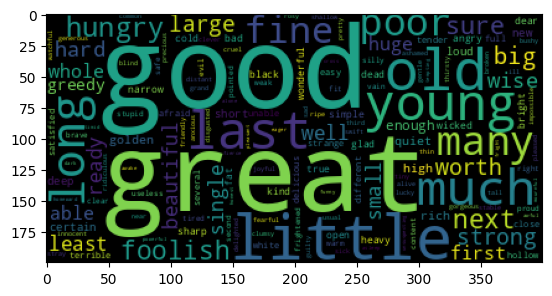

In [22]:
pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

250
      POS        Word  Freq
199   ADV        very   147
24    ADV          so   141
72    ADV        then    70
239   ADV        away    61
317   ADV        soon    55
...   ...         ...   ...
2891  ADV   strangely     1
2892  ADV      softly     1
2926  ADV  pleasantly     1
2934  ADV   meaningly     1
2953  ADV     loosely     1

[250 rows x 3 columns]


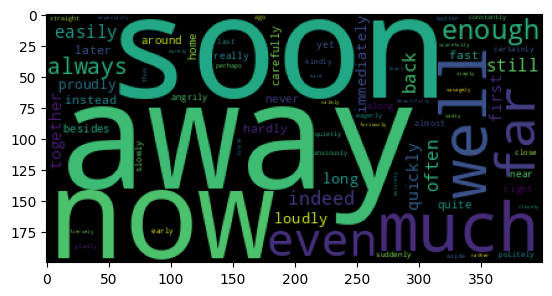

In [23]:
pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]; print(len(df1))

freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
y = list(y)

txt2 = ' '.join(y)

print(df[df["POS"] == pos])
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(collocations = False).generate(str(txt2))
plt.imshow(wc)

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
#stopwords.add('us')
len(stopwords)
spltxt = text.split()

690


(-0.5, 399.5, 199.5, -0.5)

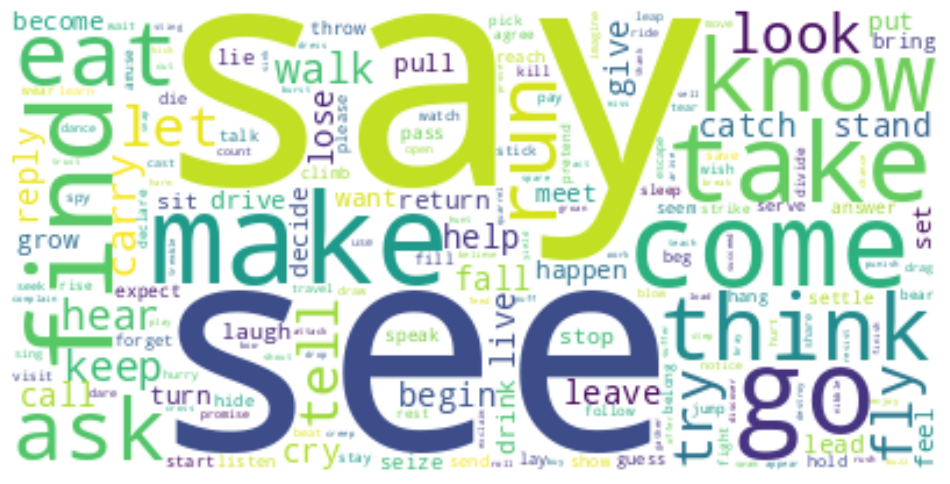

In [29]:
pos = "VERB" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]
print(len(df1))


freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



1169


(-0.5, 399.5, 199.5, -0.5)

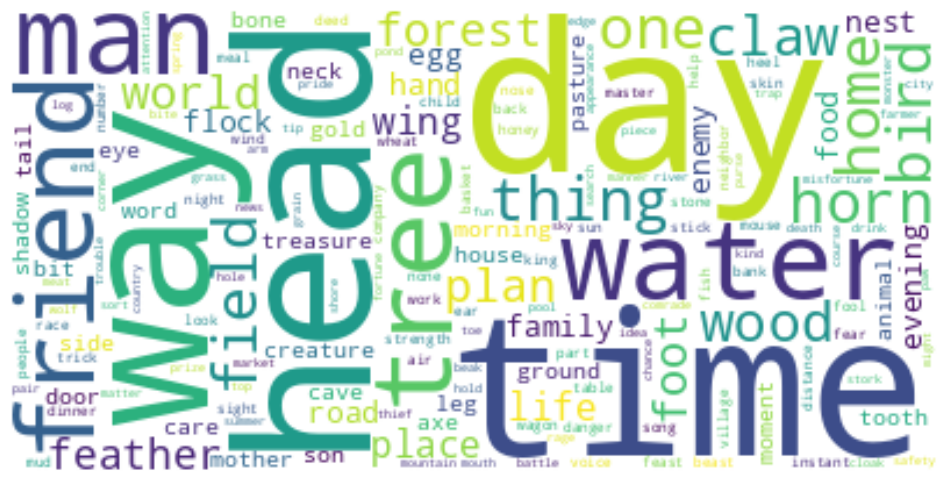

In [30]:
pos = "NOUN" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]
print(len(df1))


freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



447


(-0.5, 399.5, 199.5, -0.5)

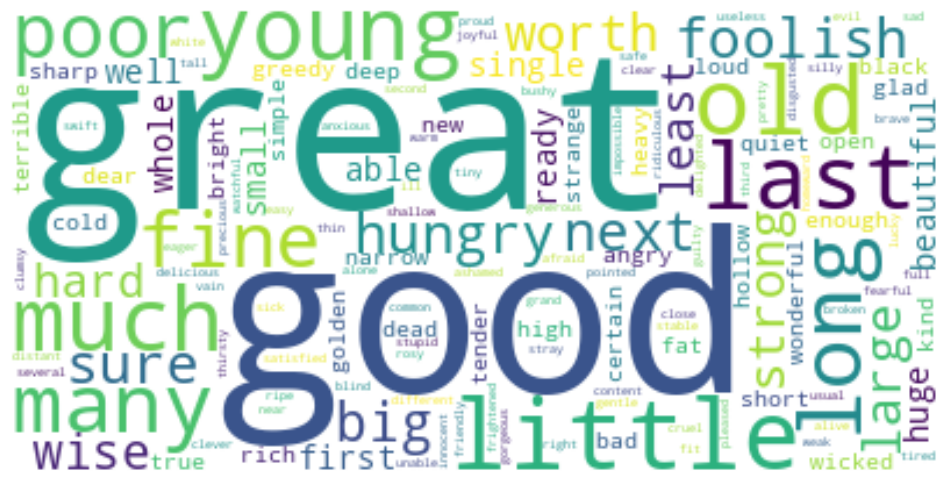

In [31]:
pos = "ADJ" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]
print(len(df1))


freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")



250


(-0.5, 399.5, 199.5, -0.5)

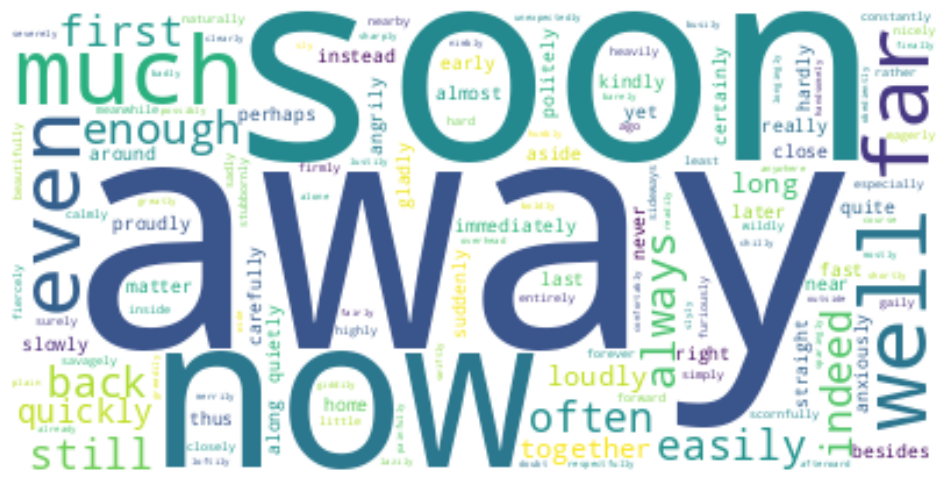

In [32]:
pos = "ADV" #@param = ["VERB","NOUN","ADJ","ADV"]
df1 = df[df["POS"] == pos]
print(len(df1))


freq1 = list(df1["Freq"])
txt1 = list(df1["Word"])

import numpy as np
y = np.repeat(txt1, freq1, axis=0)
spltxt = list(y)

wordcloud = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3, collocations = False,
                      max_words=2000, background_color='white').generate(' '.join(spltxt))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

